# Data Ingestion & Exploratory Data Analysis

This notebook downloads historical price data for a selected asset using the `yfinance` API and computes sentiment scores for a handful of sample news headlines. We then explore the structure and basic statistics of the downloaded data.

In [1]:
from pathlib import Path
import pandas as pd
from src.data_ingestion import download_price_data, fetch_sample_news, compute_sentiment_scores, save_dataframe, save_series

# Define parameters
ticker = "SPY"
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365)

# Download price data
price_df = download_price_data(ticker, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
print(price_df.head())

# Compute sentiment for sample headlines
headlines = fetch_sample_news()
sent_scores = compute_sentiment_scores(headlines)
print(list(zip(headlines, sent_scores)))

# Save raw data
save_dataframe(price_df, Path('data/raw/spy_prices.csv'))
save_series(sent_scores, Path('data/raw/sample_sentiments.csv'))

/home/oai/share/market_risk_setup/src/data_ingestion.py:58: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=interval, progress=False)



1 Failed download:


['SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, SPY), (Close, SPY), (High, SPY), (Low, SPY), (Open, SPY), (Volume, SPY)]
Index: []
[('Stocks rally as investors shrug off economic slowdown fears', 0.2), ('Central bank signals cautious approach amid inflation concerns', 0.0), ('Tech giant reports record profits beating analyst expectations', 0.0), ('Market volatility spikes after unexpected geopolitical tensions', 0.1), ('Energy sector dips on weak demand forecasts', -0.375)]


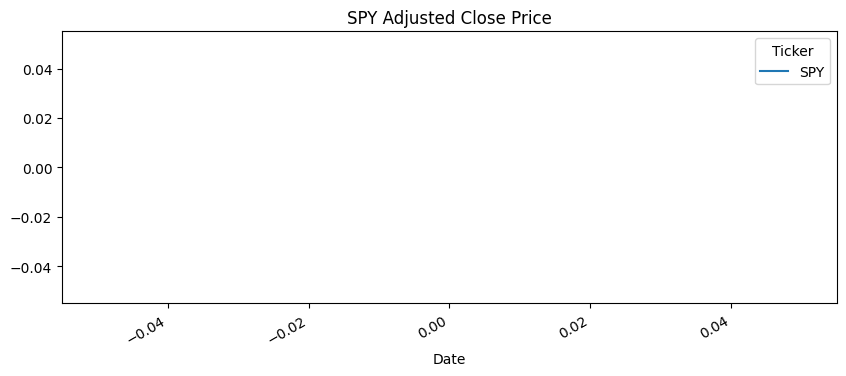

Price  Adj Close Close High  Low Open Volume
Ticker       SPY   SPY  SPY  SPY  SPY    SPY
count        0.0   0.0  0.0  0.0  0.0    0.0
mean         NaN   NaN  NaN  NaN  NaN    NaN
std          NaN   NaN  NaN  NaN  NaN    NaN
min          NaN   NaN  NaN  NaN  NaN    NaN
25%          NaN   NaN  NaN  NaN  NaN    NaN
50%          NaN   NaN  NaN  NaN  NaN    NaN
75%          NaN   NaN  NaN  NaN  NaN    NaN
max          NaN   NaN  NaN  NaN  NaN    NaN


In [2]:
# Basic EDA on price data
import matplotlib.pyplot as plt
import seaborn as sns

price_df['Adj Close'].plot(title='SPY Adjusted Close Price', figsize=(10,4))
plt.show()

print(price_df.describe())